Klassische Gewinnwahrscheinlichkeit: 0.75
Quanten Gewinnwahrscheinlichkeit: 0.84


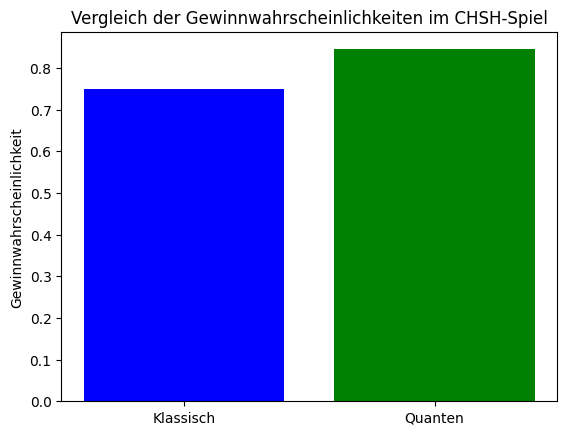

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Klassischer Ansatz des CHSH-Spiels

# Wir wollen den Erwartungswert berechnen, wenn die beiden Spieler klassisch deterministisch handeln.
def klassisches_chsh():
    # Es gibt vier mögliche Konfigurationen von Fragen (a, b)
    # Jeder Spieler muss eine Strategie wählen, die unabhängig ist von den Fragen des anderen
    # Die Fragen sind jeweils 0 oder 1
    a_values = [0, 1]
    b_values = [0, 1]
    strategie = lambda a: 0  # Spieler A gibt immer 0 zurueck
    strategie_b = lambda b: 0  # Spieler B gibt auch immer 0 zurueck

    gewinn_anzahl = 0
    gesamt_anzahl = 0

    for a in a_values:
        for b in b_values:
            # Die Spieler gewinnen, wenn die Bedingung a * b == output_a XOR output_b erfuellt ist
            output_a = strategie(a)
            output_b = strategie_b(b)
            gewinn = (output_a ^ output_b) == (a * b)

            if gewinn:
                gewinn_anzahl += 1
            gesamt_anzahl += 1

    gewinnwahrscheinlichkeit = gewinn_anzahl / gesamt_anzahl
    return gewinnwahrscheinlichkeit

klassische_wahrscheinlichkeit = klassisches_chsh()
print(f"Klassische Gewinnwahrscheinlichkeit: {klassische_wahrscheinlichkeit:.2f}")

# Quantenansatz des CHSH-Spiels

def quanten_chsh():
    # Winkel für die Quantenstrategie
    angles = {
        "00": (0, np.pi / 8),
        "01": (0, -np.pi / 8),
        "10": (np.pi / 4, np.pi / 8),
        "11": (np.pi / 4, -np.pi / 8)
    }

    # Simuliere das CHSH-Spiel für alle Eingabekombinationen
    simulator = AerSimulator()
    quantum_results = {}

    for key, (angle_a, angle_b) in angles.items():
        # Erstelle den Bell-Zustand
        qc = QuantumCircuit(2)
        qc.h(0)  # Hadamard-Gatter auf Qubit 0
        qc.cx(0, 1)  # CNOT-Gatter auf Qubit 0 und 1

        # Füge die Messung basierend auf den Winkeln hinzu
        qc.ry(2 * angle_a, 0)  # Rotation auf Qubit 0 (Alice) um Winkel angle_a
        qc.ry(2 * angle_b, 1)  # Rotation auf Qubit 1 (Bob) um Winkel angle_b
        qc.measure_all()  # Alle Qubits messen

        # Verwende den Aer-Simulator, um die Messung zu simulieren
        result = simulator.run(qc).result()
        counts = result.get_counts()
        quantum_results[key] = counts

    # Gewinnwahrscheinlichkeit berechnen
    win_counts = 0
    total_counts = 0
    for key, counts in quantum_results.items():
        x, y = int(key[0]), int(key[1])
        target = x & y
        for outcome, count in counts.items():
            a, b = int(outcome[0]), int(outcome[1])
            if a ^ b == target:
                win_counts += count
            total_counts += count

    gewinnwahrscheinlichkeit = win_counts / total_counts
    return gewinnwahrscheinlichkeit

quanten_wahrscheinlichkeit = quanten_chsh()
print(f"Quanten Gewinnwahrscheinlichkeit: {quanten_wahrscheinlichkeit:.2f}")

# Vergleich der Ergebnisse
plt.bar(['Klassisch', 'Quanten'], [klassische_wahrscheinlichkeit, quanten_wahrscheinlichkeit], color=['blue', 'green'])
plt.ylabel('Gewinnwahrscheinlichkeit')
plt.title('Vergleich der Gewinnwahrscheinlichkeiten im CHSH-Spiel')
plt.show()
